In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand, randn

%matplotlib inline

# Mobius invariant signatures

We are using the four invariants:
* $J_1 = f_i f_i$
* $J_2 = f_{ii}$
* $J_3 = \frac{n \cdot \nabla(\nabla \times n)}{\| \nabla f \|^2}$
* $J_4 = \frac{n \times \nabla(\nabla \cdot n)}{\| \nabla f \|^2}$

In [9]:
def Mobsignature(F, h=1):
    """ Compute the Mobius signature components"""
    Fx, Fy = np.gradient(F, h)
    Fxx, Fxy = np.gradient(Fx, h)
    Fyx, Fyy = np.gradient(Fy, h)
    normaliser = np.sqrt(Fx*Fx + Fy*Fy)
    
    # Do the easy ones
    J1 = Fx*Fx + Fy*Fy 
    J2 = Fxx + Fyy

    # Compute n
    n = 1/normaliser * np.array([Fx,Fy])
    
    # Compute J3
    curl = np.gradient(n[1], h)[0] - np.gradient(n[0], h)[1]
    curl_x, curl_y = np.gradient(curl, h)
    J3 = 1 / (normaliser**2) * (n[0]*curl_x + n[1]*curl_y)
    
    # Compute J4
    divergence = np.gradient(n[0], h)[0] + np.gradient(n[1], h)[1]
    divergence_x, divergence_y = np.gradient(divergence, h)
    J4 = 1 / (normaliser**2) * (n[0]*divergence_y - n[1]*divergence_x)
    
    
#    J3 = (-Fx*Fxxy + Fx*Fxyy - Fy*Fxyy + Fy*Fyyy)/(normaliser**2)
#    J4 = (Fx*Fxxy + Fx*Fyyy - Fxxx*Fy - Fy*Fxyy)/(normaliser**2)

    return (J1, J2, J3, J4)


## Test image
We use as our test function the function `f(x, y)` defined below

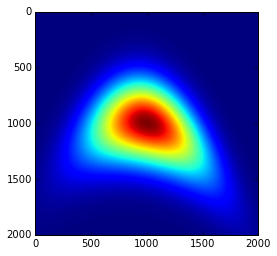

In [30]:
def f(x, y):
    return np.exp(-4*x**2 -8*(y-0.2*x - 0.8*x**2)**2)

h = 1e-3
X, Y = np.meshgrid(np.arange(-1, 1, h), np.arange(-1, 1, h))
F0 = f(X, Y)
plt.imshow(F0)

## Transformation
We generate a transformation 


In [31]:
from numpy.random import rand, randn

a = np.complex(0.9,0.1)
b = 0.1
c = np.complex(.1,0.4)
d = 1


The image and its transformation are plotted below


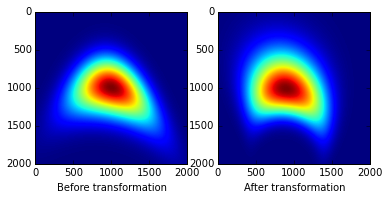

In [32]:
phi = (a*(X+Y*1j) + b)/(c*(X+Y*1j)+d)
#print np.real(phi)

F1 = f(np.real(phi),np.imag(phi))

fig, axarr = plt.subplots(1, 2)
axarr[0].imshow(F0)
axarr[0].set_xlabel('Before transformation')
axarr[1].imshow(F1)
axarr[1].set_xlabel('After transformation')

(-1.0, 1.0, -1.0, 1.0)

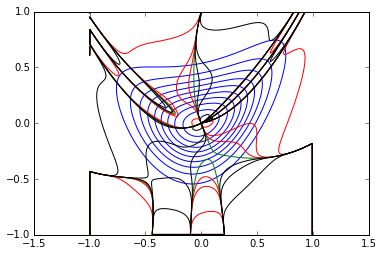

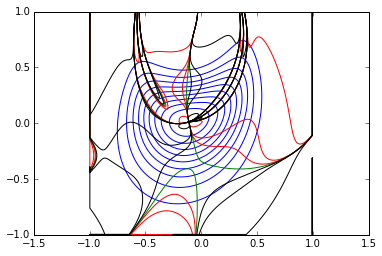

In [33]:
contour_levels = [-100, -1, -0.25, 0, 0.25, 1, 100]
contour_colours = ('red','red','red','green','black','black','black')
plt.figure()
h=0.01
sig0 = Mobsignature(F0, h)
sig1 = Mobsignature(F1, h)

plt.figure()
plt.contour(X,Y,F0,levels=np.linspace(.1,.9,9),colors='blue')
plt.contour(X,Y, sig0[2], levels=contour_levels, colors=contour_colours)
plt.axis('equal')

plt.figure()
plt.contour(X,Y,F1,levels=np.linspace(.1,.9,9),colors='blue')
plt.contour(X,Y, sig1[2], levels=contour_levels, colors=contour_colours)
plt.axis('equal')

## Compare signatures of the two images
We compare the signatures for a few contours (with respect to the function value)


<matplotlib.contour.QuadContourSet instance at 0x000000000DE6E388>

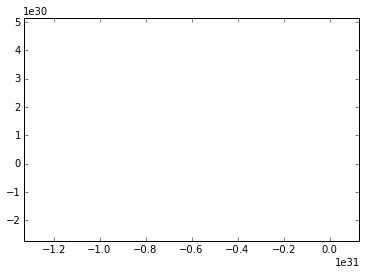

In [42]:
i0 = 2
i1 = 3

contour_levels = (0.2, 0.4, 0.6, 0.8)
plt.contour(sig0[i0], sig0[i1], F0, levels=contour_levels)

    
